# Histogram Matching

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Statistics

In [2]:
#Getsthe probability array
def calcProbabilityArray(data):
    height,width = data.shape[:2]
    unique, counts = np.unique(data, return_counts=True) #Pixel Value, Frequency of Pixel Value
    N = height * width # Number of Pixels
    counts = counts / N # Probability of each pixel value.
    arr  = [0 for k in range(256)]
    for i in range(len(counts)):
        arr[unique[i]] = counts[i]
    return arr

#Computes the hist table:  s_k
def calcHistTable(data, prob):
    s_ = [0 for i in range(256)] # arr = (prob_k, s_k)
    for k in range(256):
        s_k = 0
        for j in range(k+1):
            s_k+= prob[j]
        s_k *= 255
        s_k = round(s_k)
        s_[k] = int(s_k)
    return s_


#Maps values from sk_1 to their closes in sk_2
def getMapping(sk_1, sk_2):
    mapp = [0 for i in range(256)]
    for i in range(256):
        s_original = sk_1[i]
        best_s_index = 0
        best_s_value = sk_2[0]
        for j in range(256):
            s_cmp = sk_2[j]
            #Saving the closest
            if (abs(s_cmp - s_original) <
                abs(best_s_value - s_original)):
                best_s_index = j
                best_s_value = s_cmp
            #When their diff = 0, The highest is chosen 
            elif ((abs(s_cmp - s_original) ==
                abs(best_s_value - s_original)) and 
                s_cmp > best_s_value):
                best_s_index = j
                best_s_value = s_cmp
        mapp[i] = best_s_index
    return mapp
    
                
#Replace all pixel values with their values from the hist_table
def replace(data, s_k ):
    height,width = data.shape[:2]
    blank = np.zeros((height,width), np.uint8)
    for x in range(height):
        for y in range(width):
            curr = data[x][y]
            blank[x][y] = s_k[curr]
    return blank    
        


In [3]:
imgfile1 = '../../db/lena.png'
img1= cv2.imread(imgfile1,cv2.IMREAD_GRAYSCALE  )
height,width = img1.shape[:2]

imgfile2 = '../../db/jenny2.jpg'
img2= cv2.imread(imgfile2,cv2.IMREAD_GRAYSCALE  )
img2 = cv2.resize(img2, (width, height ))

In [4]:
prob_1 = calcProbabilityArray(img1) 
s_k_1 = calcHistTable(img1, prob_1)

prob_2 = calcProbabilityArray(img2) 
s_k_2 = calcHistTable(img2, prob_2)

mapping = getMapping(s_k_1,s_k_2)
new =  replace(img1, mapping)

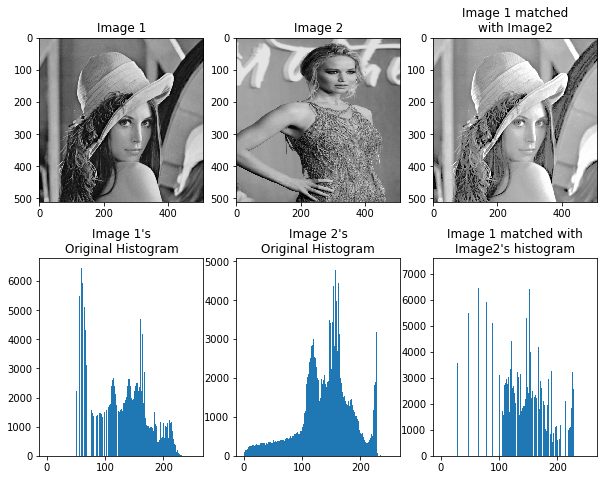

In [13]:
plt.figure(figsize=(10,8))
plt.subplot(231), plt.title("Image 1"), plt.imshow(img1, cmap='gray')
plt.subplot(232), plt.title("Image 2"), plt.imshow(img2, cmap='gray')
plt.subplot(233), plt.title("Image 1 matched\nwith Image2"), plt.imshow(new, cmap='gray')
plt.subplot(234), plt.title("Image 1's\nOriginal Histogram",), plt.hist(img1.ravel(),256, [0, 256])
plt.subplot(235), plt.title("Image 2's\nOriginal Histogram"), plt.hist(img2.ravel(),256, [0, 256])
plt.subplot(236), plt.title("Image 1 matched with\nImage2's histogram"), plt.hist(new.ravel(),256, [0, 256])
plt.show()